# Butterfly

In this tutorial, we discuss the internals of the ``butterfly`` program, used for plotting the butterfly spectrum of Hofstadter models. The code in this notebook is equivalent to running the command ``python butterfly.py -lat square -q 199`` in the sources root directory.

1) Import the necessary namespace libraries. Note that library imports are segregated into ``external imports`` from the python environment and ``internal imports`` from HofstadterTools. NB: If there is a problem importing the internal libraries, ensure that the sources root path is added to your PYTHONPATH environment variable.

In [1]:
# --- external imports
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from math import gcd
import matplotlib.ticker as ticker
# --- internal imports
from models.hofstadter import Hofstadter

2) Read in the inputs for the program. On the command line, these arguments are parsed from the input flags. For this notebook, however, we hard-code a minimal set of input values.

In [2]:
q = 199

3) Loop through $p$ values such that $n_\phi=p/q$ is rational. On each $p$ iteration, construct the model, define the flux density, and diagonalize the Hamiltonian at $\mathbf{k}=\mathbf{0}$.

In [3]:
nphi_list = []
E_list = []
for p in tqdm(range(1, q), desc="Butterfly Construction", ascii=True):

    # construct model
    model = Hofstadter(p, q)
    
    # define flux density
    if gcd(p, q) != 1:  # nphi must be a coprime fraction
        continue
    nphi = p/q

    # diagonalize Hamiltonian
    ham = model.hamiltonian(np.array([0, 0]))
    M = len(ham)
    nphi_list.append([nphi] * M)
    lmbda = np.sort(np.linalg.eigvalsh(ham))
    E_list.append(lmbda)

Butterfly Construction: 100%|##########| 198/198 [00:01<00:00, 164.41it/s]


4) Plot the butterfly spectrum.

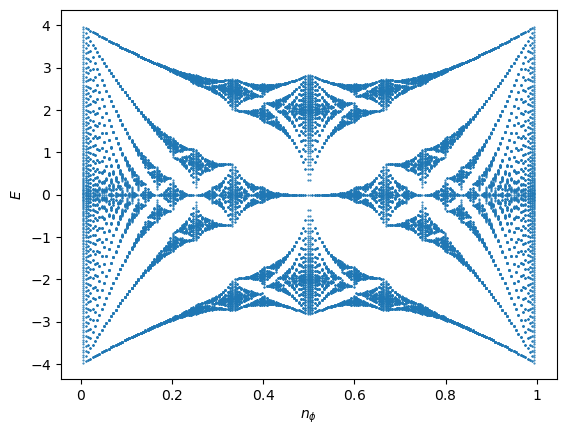

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
nphi_list = list(np.concatenate(nphi_list).ravel())
E_list = list(np.concatenate(E_list).ravel())
ax.scatter(nphi_list, E_list, s=1, marker='.')
ax.set_ylabel('$E$')
ax.set_xlabel('$n_\phi$')
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))

That's it! You have successfully plotted the butterfly spectrum for the Hofstadter model with flux densities $n_\phi=p/199$. Now, we can pause to comment on how the spectrum is interpreted. As we saw in the band structure tutorial, the bands of the Hofstadter model are not flat. However, as we approach the continuum limit $q\to\infty$ the bands tend to Landau levels, which are flat, and therefore can be represented by individual points. In HofstadterTools, we use the $\Gamma$-point ($\mathbf{k}=\mathbf{0}$) to construct the butterfly spectra. Apart from choosing a large value of $q$ to ensure that the bands are approximately flat, it is most effective to also choose a prime number, such that we generate the maximal set of coprime fractions $n_\phi=p/q$. Finally, we note the periodicity of the spectrum. The fact that the $n_\phi=0,1$ spectra are identical is because we have captured the entire butterfly and, hence, have defined the flux density with respect to an area that is minimal for the model. By default, HofstadterTools defines the flux density with respect the lattice unit cell area, however if there is a different area scale in the problem, this may need to be adjusted using the ``--periodicity`` flag. 